In [1]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
processedData = pd.read_csv("F:\Circus Social ML Task\Data\processedData.csv", index_col= ['Published DateTime'])

In [3]:
processedData

,Line Count,Word Count,Language,Sentiment score,Post Length,Hashtag count,Content URL count,Tweet count,Followers count,Listed Count,Mentions Count,Post author verified,Likes,Shares,Comments,Hour,Media Type 2,Media Type 1,Impact
Published DateTime,,,,,,,,,,,,,,,,,,,
2020-03-31 18:37:46+00:00,1,12,10,0.00,127.0,0.0,1.0,3674.0,154.0,0,0.0,0.0,0.0,0.0,0.0,18,0,0,0.0
2020-03-31 18:45:47+00:00,5,44,10,0.00,303.0,1.0,1.0,386323.0,5779057.0,26399,0.0,1.0,89.0,57.0,0.0,18,0,0,1460.0
2020-03-31 18:47:30+00:00,7,21,10,0.00,211.0,3.0,0.0,9985.0,341.0,0,1.0,0.0,42.0,60.0,0.0,18,0,0,1020.0
2020-03-31 19:11:04+00:00,1,21,10,-10.59,149.0,0.0,0.0,150775.0,2542491.0,10522,0.0,1.0,9242.0,6455.0,0.0,19,0,0,156970.0
2020-03-31 19:34:25+00:00,1,43,10,0.00,260.0,1.0,0.0,940.0,13985263.0,9235,1.0,1.0,53823.0,9080.0,8.0,19,0,1,629110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-30 12:45:44+00:00,8,48,20,11.62,301.0,0.0,0.0,30678.0,14481.0,10,0.0,0.0,5812.0,6312.0,3.0,12,0,1,121270.0
2021-05-30 13:30:00+00:00,1,10,10,0.00,64.0,0.0,0.0,122072.0,173070.0,236,0.0,1.0,10351.0,818.0,0.0,13,0,1,111690.0
2021-05-30 14:27:02+00:00,1,10,10,0.00,76.0,1.0,1.0,1895.0,1119518.0,7026,0.0,1.0,11447.0,1373.0,7.0,14,0,1,128270.0


In [4]:
# Train-test split

X = processedData.iloc[:,:-1]
y = processedData.iloc[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Linear Regression Model

In [5]:
%%time

model = LinearRegression()

model.fit(X_train,y_train)

Wall time: 76.8 ms


LinearRegression()

In [6]:
y_pred = model.predict(X_test)

In [7]:
mean_squared_error(y_test, y_pred, squared = False)

11.532345307770889

In [8]:
results = pd.DataFrame({'y_true':y_test['Impact'].tolist(), 'y_pred': y_pred.flatten()})

<AxesSubplot:>

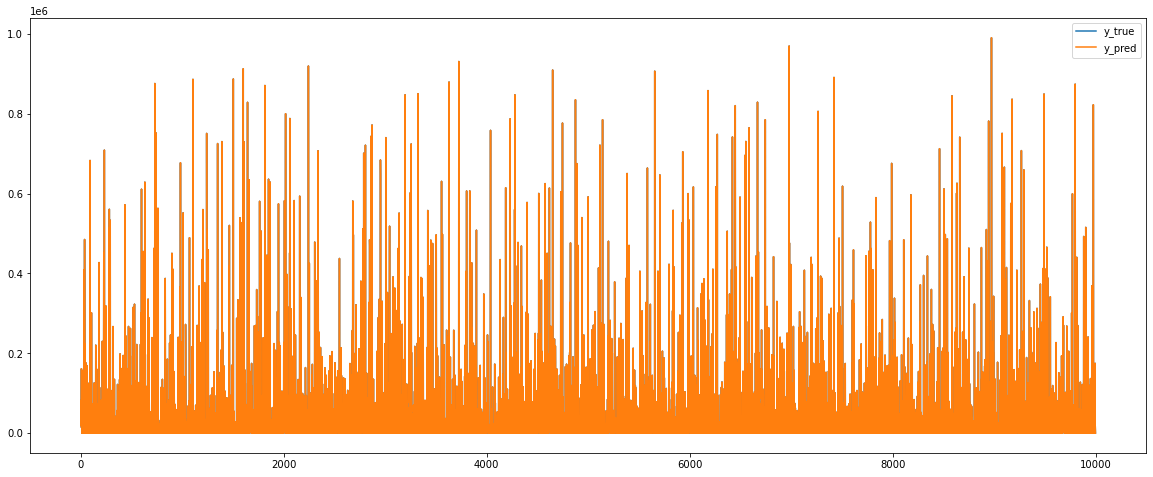

In [9]:
results.plot(figsize = (20,8))

# Linear Regression with 3 main identifies features = Likes, Shares and CommentsX_train

In [10]:
model2 = LinearRegression()

model2.fit(X_train[['Likes','Shares','Comments']],y_train)

LinearRegression()

In [11]:
y_pred = model2.predict(X_test[['Likes','Shares','Comments']])

In [12]:
mean_squared_error(y_test, y_pred, squared = False)

11.535260964931343

In [13]:
results = pd.DataFrame({'y_true':y_test['Impact'].tolist(), 'y_pred': y_pred.flatten()})

<AxesSubplot:>

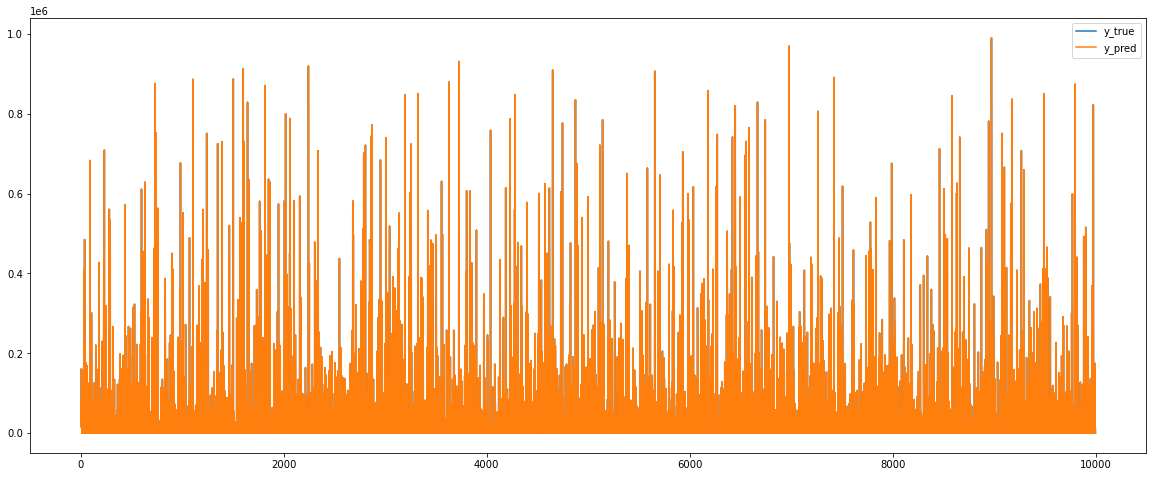

In [14]:
results.plot(figsize = (20,8))